
# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

# helper.download_extract('mnist', data_dir)
# helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

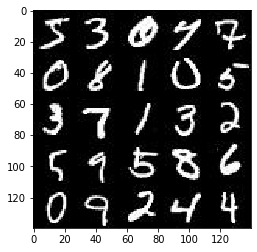

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

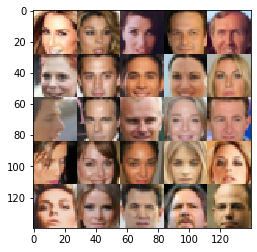

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.14.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None,z_dim), name = 'inputs_z')
    learning_rate = tf.placeholder(tf.float32)
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)


Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse) :

        x = tf.layers.conv2d(images, 64, 5, 2, 'same')
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 128, 5, 2, 'same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)

        x = tf.layers.conv2d(x, 256, 5, 2, 'same')
        x = tf.layers.batch_normalization(x, training=True)
        x = tf.maximum(alpha * x, x)

        x = tf.reshape(x,(-1,4*4*256))

        logits = tf.layers.dense(x,1)
        out = tf.sigmoid(logits)

    return logits, out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\omen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3345, in run_code
    return outflag  File "<ipython-input-5-43f94a5cbfe0>", line 22, in <module>
    tests.test_model_inputs(model_inputs)  File "e:\deep-learning\face_generation\problem_unittests.py", line 14, in func_wrapper
    return result  File "e:\deep-learning\face_generation\problem_unittests.py", line 68, in test_model_inputs
    _check_input(learn_rate, [], 'Learning Rate')  File "e:\deep-learning\face_generation\problem_unittests.py", line 38, in _check_input
    '{} has bad name.  Found name {}'.format(display_name, tensor.name)  File "e:\deep-learning\face_generation\problem_unittests.py", line 27, in _

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train) :

        x = tf.layers.dense(z, 2*2*256)
        x = tf.reshape(x,(-1,2,2,256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x , x)

        x = tf.layers.conv2d_transpose(x,128, 5, 2,padding='valid')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)

        x = tf.layers.conv2d_transpose(x,64, 5, 2,padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x, x)

        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5,2, padding='same')
        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_logits_real, d_model_real = discriminator(input_real)
    d_logits_fake, d_model_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))

    d_loss_fake = tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_fake + d_loss_real

    g_loss = tf.reduce_mean(
                        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)


Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, len(data_image_mode))
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    saver = tf.train.Saver()
    samples, losses = [], []
    sample = np.random.uniform(-1,1, size=(25,z_dim))
    print_every = 10
    steps = 0 
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1
                # sample batch for G
                batch_z = np.random.uniform(-1,1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict = {input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict = {input_real: batch_images, input_z: batch_z, lr: learning_rate})

                if steps % print_every == 0:

                    train_loss_d = d_loss.eval({input_real:batch_images, input_z: batch_z, lr: learning_rate})
                    train_loss_g = g_loss.eval({input_real:batch_images, input_z: batch_z, lr: learning_rate})

                    print('Epoch {}/{}...'.format(epoch_i+1, epoch_count),
                          'Discriminator_loss: {}'.format(train_loss_d),
                          'Generator_loss: {}'.format(train_loss_g))
                    losses.append((train_loss_d,train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, tf.convert_to_tensor(sample, dtype=tf.float32) , len(data_image_mode), data_image_mode)
        
        saver.save(sess, './checkpoints/generator.ckpt')
                


                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator_loss: 0.08371552079916 Generator_loss: 15.903081893920898
Epoch 1/2... Discriminator_loss: 1.3108617067337036 Generator_loss: 1.4576019048690796
Epoch 1/2... Discriminator_loss: 7.9785359048401e-06 Generator_loss: 13.985570907592773
Epoch 1/2... Discriminator_loss: 0.00546600017696619 Generator_loss: 6.828471660614014
Epoch 1/2... Discriminator_loss: 0.006871485151350498 Generator_loss: 6.395210266113281
Epoch 1/2... Discriminator_loss: 0.0018214782467111945 Generator_loss: 7.948775291442871
Epoch 1/2... Discriminator_loss: 1.4505068063735962 Generator_loss: 0.9374873638153076
Epoch 1/2... Discriminator_loss: 0.10550686717033386 Generator_loss: 10.141706466674805
Epoch 1/2... Discriminator_loss: 0.008990730158984661 Generator_loss: 5.632552146911621
Epoch 1/2... Discriminator_loss: 0.007461056113243103 Generator_loss: 5.437015533447266


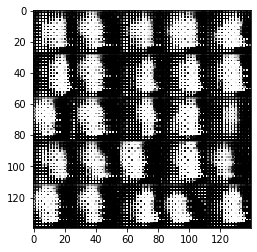

Epoch 1/2... Discriminator_loss: 0.013318049721419811 Generator_loss: 5.231721878051758
Epoch 1/2... Discriminator_loss: 0.21314793825149536 Generator_loss: 12.513895988464355
Epoch 1/2... Discriminator_loss: 0.02704835683107376 Generator_loss: 5.47343635559082
Epoch 1/2... Discriminator_loss: 0.010678902268409729 Generator_loss: 5.4366230964660645
Epoch 1/2... Discriminator_loss: 0.008002965711057186 Generator_loss: 6.020537376403809
Epoch 1/2... Discriminator_loss: 0.0064404685981571674 Generator_loss: 5.657214164733887
Epoch 1/2... Discriminator_loss: 0.009595310315489769 Generator_loss: 5.364827632904053
Epoch 1/2... Discriminator_loss: 0.013892536982893944 Generator_loss: 5.4152374267578125
Epoch 1/2... Discriminator_loss: 0.019983386620879173 Generator_loss: 5.401628017425537
Epoch 1/2... Discriminator_loss: 0.016927175223827362 Generator_loss: 5.582756996154785


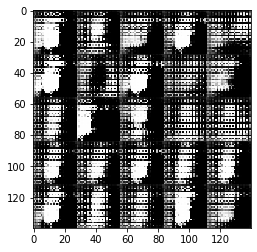

Epoch 1/2... Discriminator_loss: 0.04907834529876709 Generator_loss: 7.21342658996582
Epoch 1/2... Discriminator_loss: 0.1332230418920517 Generator_loss: 5.0655670166015625
Epoch 1/2... Discriminator_loss: 0.052298545837402344 Generator_loss: 4.117717742919922
Epoch 1/2... Discriminator_loss: 0.03465539589524269 Generator_loss: 4.041477203369141
Epoch 1/2... Discriminator_loss: 0.03316781669855118 Generator_loss: 4.505138397216797
Epoch 1/2... Discriminator_loss: 0.011878284625709057 Generator_loss: 5.284415245056152
Epoch 1/2... Discriminator_loss: 0.027008604258298874 Generator_loss: 4.850841522216797
Epoch 1/2... Discriminator_loss: 0.01699144020676613 Generator_loss: 5.351478099822998
Epoch 1/2... Discriminator_loss: 0.012273025698959827 Generator_loss: 5.4082536697387695
Epoch 1/2... Discriminator_loss: 0.11926791071891785 Generator_loss: 6.788745880126953


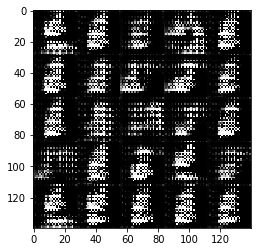

Epoch 1/2... Discriminator_loss: 0.008938397280871868 Generator_loss: 6.291326999664307
Epoch 1/2... Discriminator_loss: 0.06448294222354889 Generator_loss: 3.702975273132324
Epoch 1/2... Discriminator_loss: 0.03341059386730194 Generator_loss: 6.259552955627441
Epoch 1/2... Discriminator_loss: 0.03516673296689987 Generator_loss: 5.610424995422363
Epoch 1/2... Discriminator_loss: 0.032236248254776 Generator_loss: 6.574343204498291
Epoch 1/2... Discriminator_loss: 0.16643297672271729 Generator_loss: 3.785163640975952
Epoch 1/2... Discriminator_loss: 0.2670559883117676 Generator_loss: 3.3398780822753906
Epoch 1/2... Discriminator_loss: 0.03501996397972107 Generator_loss: 4.598002910614014
Epoch 1/2... Discriminator_loss: 0.06556664407253265 Generator_loss: 3.8037467002868652
Epoch 1/2... Discriminator_loss: 0.03550739958882332 Generator_loss: 4.424324035644531


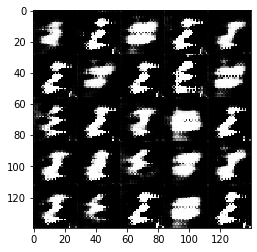

Epoch 1/2... Discriminator_loss: 0.3822554349899292 Generator_loss: 6.071540832519531
Epoch 1/2... Discriminator_loss: 0.04002023860812187 Generator_loss: 5.733606815338135
Epoch 1/2... Discriminator_loss: 0.07277139276266098 Generator_loss: 5.132771968841553
Epoch 1/2... Discriminator_loss: 0.061443593353033066 Generator_loss: 3.725445032119751
Epoch 1/2... Discriminator_loss: 0.04467855021357536 Generator_loss: 4.654388904571533
Epoch 1/2... Discriminator_loss: 0.0232461616396904 Generator_loss: 5.002112865447998
Epoch 1/2... Discriminator_loss: 0.0233464352786541 Generator_loss: 6.889758586883545
Epoch 1/2... Discriminator_loss: 0.009960970841348171 Generator_loss: 5.835562705993652
Epoch 1/2... Discriminator_loss: 0.010460764169692993 Generator_loss: 5.365799427032471
Epoch 1/2... Discriminator_loss: 0.010272637940943241 Generator_loss: 5.330676078796387


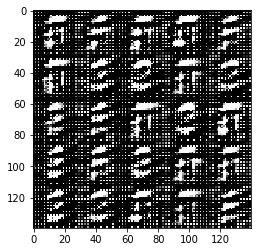

Epoch 1/2... Discriminator_loss: 0.005755305290222168 Generator_loss: 6.023153305053711
Epoch 1/2... Discriminator_loss: 0.004608652554452419 Generator_loss: 6.148502349853516
Epoch 1/2... Discriminator_loss: 0.004208819940686226 Generator_loss: 6.716280937194824
Epoch 1/2... Discriminator_loss: 0.0029654852114617825 Generator_loss: 6.289977073669434
Epoch 1/2... Discriminator_loss: 0.002660021185874939 Generator_loss: 6.6785736083984375
Epoch 1/2... Discriminator_loss: 0.0046082306653261185 Generator_loss: 6.237112045288086
Epoch 1/2... Discriminator_loss: 0.006291797384619713 Generator_loss: 6.5374040603637695
Epoch 1/2... Discriminator_loss: 0.003158863168209791 Generator_loss: 7.434276103973389
Epoch 1/2... Discriminator_loss: 0.0033210183028131723 Generator_loss: 7.008943557739258
Epoch 1/2... Discriminator_loss: 0.004450141917914152 Generator_loss: 7.0207719802856445


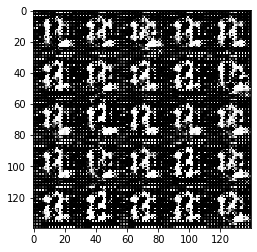

Epoch 1/2... Discriminator_loss: 0.0028922706842422485 Generator_loss: 6.522800922393799
Epoch 1/2... Discriminator_loss: 0.002372997347265482 Generator_loss: 7.743607521057129
Epoch 1/2... Discriminator_loss: 0.002430722815915942 Generator_loss: 7.492644786834717
Epoch 1/2... Discriminator_loss: 0.0023356699384748936 Generator_loss: 8.04383659362793
Epoch 1/2... Discriminator_loss: 0.0014194773975759745 Generator_loss: 8.429733276367188
Epoch 1/2... Discriminator_loss: 0.0022861906327307224 Generator_loss: 7.341998100280762
Epoch 1/2... Discriminator_loss: 0.003698000917211175 Generator_loss: 6.9986982345581055
Epoch 1/2... Discriminator_loss: 0.0011488134041428566 Generator_loss: 7.444949626922607
Epoch 1/2... Discriminator_loss: 0.011926106177270412 Generator_loss: 4.833925247192383
Epoch 1/2... Discriminator_loss: 0.14913278818130493 Generator_loss: 3.1146812438964844


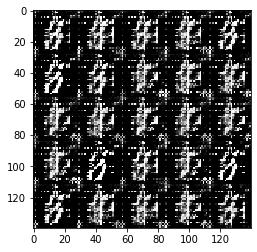

Epoch 1/2... Discriminator_loss: 0.06376111507415771 Generator_loss: 3.564197540283203
Epoch 1/2... Discriminator_loss: 0.07819826900959015 Generator_loss: 5.014467239379883
Epoch 1/2... Discriminator_loss: 0.11240513622760773 Generator_loss: 7.750378608703613
Epoch 1/2... Discriminator_loss: 0.11946211755275726 Generator_loss: 5.559117794036865
Epoch 1/2... Discriminator_loss: 0.05277051404118538 Generator_loss: 4.324338912963867
Epoch 1/2... Discriminator_loss: 0.035099443048238754 Generator_loss: 4.320955276489258
Epoch 1/2... Discriminator_loss: 0.022068627178668976 Generator_loss: 4.962675094604492
Epoch 1/2... Discriminator_loss: 0.026496868580579758 Generator_loss: 4.823677062988281
Epoch 1/2... Discriminator_loss: 0.019627060741186142 Generator_loss: 5.777917861938477
Epoch 1/2... Discriminator_loss: 0.045631833374500275 Generator_loss: 4.995172023773193


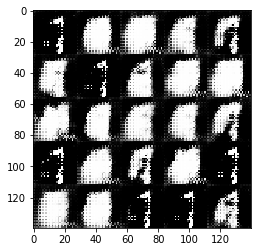

Epoch 1/2... Discriminator_loss: 0.062167078256607056 Generator_loss: 6.567384243011475
Epoch 1/2... Discriminator_loss: 0.022091956809163094 Generator_loss: 7.449702262878418
Epoch 1/2... Discriminator_loss: 1.1043310165405273 Generator_loss: 7.5019683837890625
Epoch 1/2... Discriminator_loss: 0.23891669511795044 Generator_loss: 4.092225074768066
Epoch 1/2... Discriminator_loss: 0.04766911268234253 Generator_loss: 4.1922197341918945
Epoch 1/2... Discriminator_loss: 0.033176761120557785 Generator_loss: 4.259102821350098
Epoch 1/2... Discriminator_loss: 0.04050590470433235 Generator_loss: 4.631219863891602
Epoch 1/2... Discriminator_loss: 0.06857366114854813 Generator_loss: 3.727553606033325
Epoch 1/2... Discriminator_loss: 0.019297845661640167 Generator_loss: 7.432050704956055
Epoch 1/2... Discriminator_loss: 0.0006861679721623659 Generator_loss: 9.035279273986816


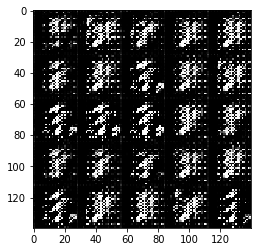

Epoch 1/2... Discriminator_loss: 0.021067121997475624 Generator_loss: 5.868115425109863
Epoch 1/2... Discriminator_loss: 0.7702174782752991 Generator_loss: 1.1777267456054688
Epoch 1/2... Discriminator_loss: 0.0005517079262062907 Generator_loss: 18.99788475036621
Epoch 1/2... Discriminator_loss: 0.008158884011209011 Generator_loss: 12.127180099487305
Epoch 1/2... Discriminator_loss: 0.006082852371037006 Generator_loss: 8.219325065612793
Epoch 1/2... Discriminator_loss: 0.009132546372711658 Generator_loss: 7.378830432891846
Epoch 1/2... Discriminator_loss: 0.00434870645403862 Generator_loss: 7.704216003417969
Epoch 1/2... Discriminator_loss: 0.001791343791410327 Generator_loss: 7.361944198608398
Epoch 1/2... Discriminator_loss: 0.004496358335018158 Generator_loss: 6.907332420349121
Epoch 1/2... Discriminator_loss: 0.0029161106795072556 Generator_loss: 7.891163349151611


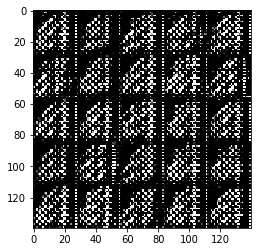

Epoch 1/2... Discriminator_loss: 0.004679936449974775 Generator_loss: 7.741795539855957
Epoch 1/2... Discriminator_loss: 0.002398246666416526 Generator_loss: 7.086063861846924
Epoch 1/2... Discriminator_loss: 0.001984050264582038 Generator_loss: 7.400376796722412
Epoch 1/2... Discriminator_loss: 0.002264501294121146 Generator_loss: 6.940427303314209
Epoch 1/2... Discriminator_loss: 0.002690784400328994 Generator_loss: 7.212174415588379
Epoch 1/2... Discriminator_loss: 0.014236902818083763 Generator_loss: 6.966556549072266
Epoch 1/2... Discriminator_loss: 0.007311936002224684 Generator_loss: 7.027525901794434
Epoch 1/2... Discriminator_loss: 0.005442442372441292 Generator_loss: 8.623249053955078
Epoch 1/2... Discriminator_loss: 0.0049040731973946095 Generator_loss: 7.904595375061035
Epoch 1/2... Discriminator_loss: 0.00312129152007401 Generator_loss: 9.37012767791748


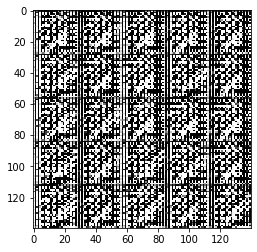

Epoch 1/2... Discriminator_loss: 0.0016088357660919428 Generator_loss: 8.180131912231445
Epoch 1/2... Discriminator_loss: 0.001391980447806418 Generator_loss: 7.406406402587891
Epoch 1/2... Discriminator_loss: 0.0013201922411099076 Generator_loss: 6.9875383377075195
Epoch 1/2... Discriminator_loss: 0.00214303913526237 Generator_loss: 6.842928409576416
Epoch 1/2... Discriminator_loss: 0.0006027789204381406 Generator_loss: 7.671573638916016
Epoch 1/2... Discriminator_loss: 0.002040982712060213 Generator_loss: 6.626975059509277
Epoch 1/2... Discriminator_loss: 0.002265304559841752 Generator_loss: 6.757314205169678
Epoch 1/2... Discriminator_loss: 0.0019375497940927744 Generator_loss: 6.509403228759766
Epoch 1/2... Discriminator_loss: 0.0014044803101569414 Generator_loss: 7.626703262329102
Epoch 1/2... Discriminator_loss: 0.0024327419232577085 Generator_loss: 6.4369001388549805


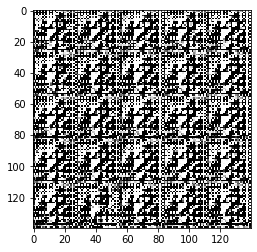

Epoch 1/2... Discriminator_loss: 0.001327519421465695 Generator_loss: 7.247812747955322
Epoch 1/2... Discriminator_loss: 0.0019403609912842512 Generator_loss: 6.939364910125732
Epoch 1/2... Discriminator_loss: 0.0023921553511172533 Generator_loss: 6.350513458251953
Epoch 1/2... Discriminator_loss: 0.0005450223106890917 Generator_loss: 7.833006858825684
Epoch 1/2... Discriminator_loss: 0.000753746775444597 Generator_loss: 7.799257278442383
Epoch 1/2... Discriminator_loss: 0.0012204687809571624 Generator_loss: 7.356545448303223
Epoch 1/2... Discriminator_loss: 0.0008738191099837422 Generator_loss: 7.4991631507873535
Epoch 1/2... Discriminator_loss: 0.0004136890347581357 Generator_loss: 8.304643630981445
Epoch 1/2... Discriminator_loss: 0.0008847969584167004 Generator_loss: 7.68256950378418
Epoch 1/2... Discriminator_loss: 0.0006859559216536582 Generator_loss: 7.564968585968018


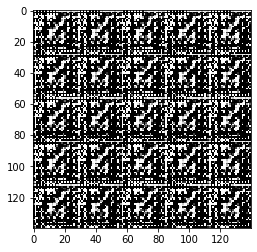

Epoch 1/2... Discriminator_loss: 0.0008900361717678607 Generator_loss: 7.280181407928467
Epoch 1/2... Discriminator_loss: 0.000532555568497628 Generator_loss: 7.883079528808594
Epoch 1/2... Discriminator_loss: 0.0008738363394513726 Generator_loss: 7.573293209075928
Epoch 1/2... Discriminator_loss: 0.0005381557857617736 Generator_loss: 7.974702835083008
Epoch 1/2... Discriminator_loss: 0.001221961691044271 Generator_loss: 7.606101036071777
Epoch 1/2... Discriminator_loss: 0.0011063995771110058 Generator_loss: 7.172670364379883
Epoch 1/2... Discriminator_loss: 0.0008283759816549718 Generator_loss: 7.44442081451416
Epoch 1/2... Discriminator_loss: 0.003738684579730034 Generator_loss: 5.8297529220581055
Epoch 1/2... Discriminator_loss: 0.0007984862313605845 Generator_loss: 7.4263410568237305
Epoch 1/2... Discriminator_loss: 0.0008447321015410125 Generator_loss: 7.757868766784668


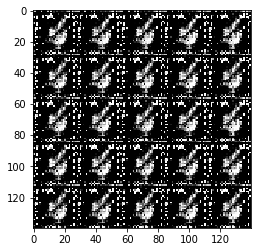

Epoch 1/2... Discriminator_loss: 0.002054758369922638 Generator_loss: 7.193526268005371
Epoch 1/2... Discriminator_loss: 0.002018498256802559 Generator_loss: 6.710641860961914
Epoch 1/2... Discriminator_loss: 0.0017469003796577454 Generator_loss: 6.855795860290527
Epoch 1/2... Discriminator_loss: 0.002649088390171528 Generator_loss: 11.068193435668945
Epoch 1/2... Discriminator_loss: 0.0011076120426878333 Generator_loss: 7.155637741088867
Epoch 1/2... Discriminator_loss: 0.0014939896063879132 Generator_loss: 7.146442413330078
Epoch 1/2... Discriminator_loss: 0.0009504961781203747 Generator_loss: 7.404694557189941
Epoch 1/2... Discriminator_loss: 0.0006962677580304444 Generator_loss: 7.405943870544434
Epoch 1/2... Discriminator_loss: 0.002567497082054615 Generator_loss: 6.064505577087402
Epoch 1/2... Discriminator_loss: 0.0016274919034913182 Generator_loss: 6.56353759765625


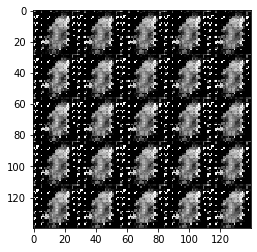

Epoch 1/2... Discriminator_loss: 0.0032540741376578808 Generator_loss: 6.015191555023193
Epoch 1/2... Discriminator_loss: 0.001432451419532299 Generator_loss: 6.7618207931518555
Epoch 1/2... Discriminator_loss: 0.0013207754818722606 Generator_loss: 7.013998031616211
Epoch 1/2... Discriminator_loss: 0.0011120124254375696 Generator_loss: 7.115212917327881
Epoch 1/2... Discriminator_loss: 0.0005461969994939864 Generator_loss: 7.783879280090332
Epoch 1/2... Discriminator_loss: 0.0006850754143670201 Generator_loss: 7.624419212341309
Epoch 1/2... Discriminator_loss: 0.0004475622554309666 Generator_loss: 7.881477355957031
Epoch 1/2... Discriminator_loss: 0.0005114509840495884 Generator_loss: 8.049627304077148
Epoch 1/2... Discriminator_loss: 0.00033690640702843666 Generator_loss: 8.273065567016602
Epoch 1/2... Discriminator_loss: 0.0004849609103985131 Generator_loss: 8.031550407409668


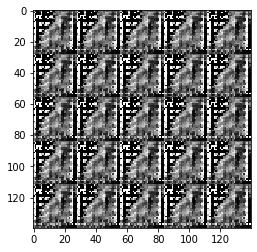

Epoch 1/2... Discriminator_loss: 0.0010779352160170674 Generator_loss: 7.079322814941406
Epoch 1/2... Discriminator_loss: 0.0013371167005971074 Generator_loss: 6.781878471374512
Epoch 1/2... Discriminator_loss: 0.0013469960540533066 Generator_loss: 6.976064682006836
Epoch 1/2... Discriminator_loss: 0.002089377027004957 Generator_loss: 6.348301887512207
Epoch 1/2... Discriminator_loss: 0.0017162102740257978 Generator_loss: 6.629978179931641
Epoch 1/2... Discriminator_loss: 0.0011502496199682355 Generator_loss: 7.055686950683594
Epoch 1/2... Discriminator_loss: 0.0005607103812508285 Generator_loss: 7.638296604156494
Epoch 1/2... Discriminator_loss: 0.0007742525194771588 Generator_loss: 7.342172622680664
Epoch 1/2... Discriminator_loss: 0.0009548182715661824 Generator_loss: 7.132748126983643
Epoch 1/2... Discriminator_loss: 0.0012452744413167238 Generator_loss: 6.866572856903076


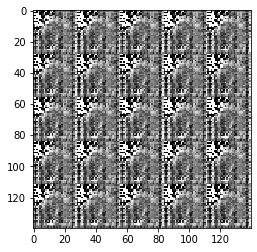

Epoch 1/2... Discriminator_loss: 0.002459828043356538 Generator_loss: 6.161191940307617
Epoch 1/2... Discriminator_loss: 0.0022504746448248625 Generator_loss: 6.20216703414917
Epoch 1/2... Discriminator_loss: 0.0011630577500909567 Generator_loss: 6.863401412963867
Epoch 1/2... Discriminator_loss: 0.0005612499080598354 Generator_loss: 7.70840311050415
Epoch 1/2... Discriminator_loss: 0.00040171502041630447 Generator_loss: 8.041116714477539
Epoch 1/2... Discriminator_loss: 0.0004351325915195048 Generator_loss: 7.9783735275268555
Epoch 1/2... Discriminator_loss: 0.000593469652812928 Generator_loss: 8.370012283325195
Epoch 1/2... Discriminator_loss: 0.0006412520888261497 Generator_loss: 8.386098861694336
Epoch 1/2... Discriminator_loss: 0.0005060224211774766 Generator_loss: 8.45862102508545
Epoch 1/2... Discriminator_loss: 0.0005756636383011937 Generator_loss: 7.870786666870117


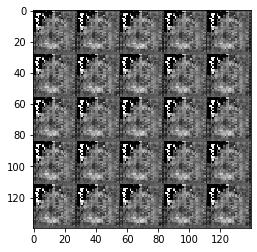

Epoch 1/2... Discriminator_loss: 0.00034439563751220703 Generator_loss: 8.228140830993652
Epoch 1/2... Discriminator_loss: 0.00041659752605482936 Generator_loss: 8.088351249694824
Epoch 1/2... Discriminator_loss: 0.00040384242311120033 Generator_loss: 8.234655380249023
Epoch 1/2... Discriminator_loss: 0.012643120251595974 Generator_loss: 4.423971652984619
Epoch 1/2... Discriminator_loss: 0.010130362585186958 Generator_loss: 4.647696495056152
Epoch 1/2... Discriminator_loss: 0.11178138852119446 Generator_loss: 5.243408679962158
Epoch 1/2... Discriminator_loss: 0.013365217484533787 Generator_loss: 5.499581813812256
Epoch 2/2... Discriminator_loss: 0.003636464709416032 Generator_loss: 7.27559232711792
Epoch 2/2... Discriminator_loss: 0.012535995803773403 Generator_loss: 4.778113842010498
Epoch 2/2... Discriminator_loss: 0.0049644894897937775 Generator_loss: 5.82594108581543


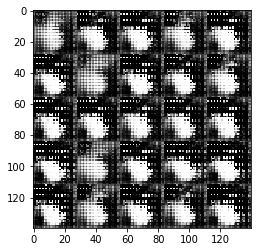

Epoch 2/2... Discriminator_loss: 0.004719865974038839 Generator_loss: 6.614327430725098
Epoch 2/2... Discriminator_loss: 0.00788369681686163 Generator_loss: 5.4225172996521
Epoch 2/2... Discriminator_loss: 0.06720948964357376 Generator_loss: 3.4738497734069824
Epoch 2/2... Discriminator_loss: 0.012148741632699966 Generator_loss: 6.754641532897949
Epoch 2/2... Discriminator_loss: 0.010190852917730808 Generator_loss: 6.790863037109375
Epoch 2/2... Discriminator_loss: 0.011040057986974716 Generator_loss: 7.469808578491211
Epoch 2/2... Discriminator_loss: 0.01630249246954918 Generator_loss: 5.30293083190918
Epoch 2/2... Discriminator_loss: 0.005367220379412174 Generator_loss: 6.389614582061768
Epoch 2/2... Discriminator_loss: 0.022185204550623894 Generator_loss: 5.538713455200195
Epoch 2/2... Discriminator_loss: 0.0637398511171341 Generator_loss: 8.797407150268555


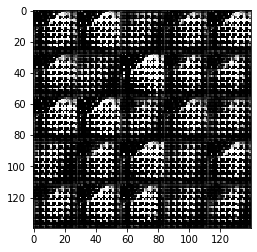

Epoch 2/2... Discriminator_loss: 0.014760836027562618 Generator_loss: 10.51782512664795
Epoch 2/2... Discriminator_loss: 0.032456204295158386 Generator_loss: 6.362919330596924
Epoch 2/2... Discriminator_loss: 0.0275973342359066 Generator_loss: 6.032574653625488
Epoch 2/2... Discriminator_loss: 0.00479224743321538 Generator_loss: 7.2057952880859375
Epoch 2/2... Discriminator_loss: 0.006137531250715256 Generator_loss: 6.595934867858887
Epoch 2/2... Discriminator_loss: 0.002921503968536854 Generator_loss: 6.60153865814209
Epoch 2/2... Discriminator_loss: 0.006526884622871876 Generator_loss: 5.8970746994018555
Epoch 2/2... Discriminator_loss: 0.0022238572128117085 Generator_loss: 7.1731157302856445
Epoch 2/2... Discriminator_loss: 0.0014716933947056532 Generator_loss: 7.351698398590088
Epoch 2/2... Discriminator_loss: 0.0026067134458571672 Generator_loss: 7.247391223907471


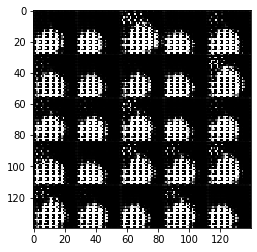

Epoch 2/2... Discriminator_loss: 0.00130153214558959 Generator_loss: 8.26082992553711
Epoch 2/2... Discriminator_loss: 0.002401029923930764 Generator_loss: 7.358059883117676
Epoch 2/2... Discriminator_loss: 0.0023432776797562838 Generator_loss: 14.116236686706543
Epoch 2/2... Discriminator_loss: 0.006777098868042231 Generator_loss: 8.658025741577148
Epoch 2/2... Discriminator_loss: 0.02448670007288456 Generator_loss: 5.428515911102295
Epoch 2/2... Discriminator_loss: 0.011219291016459465 Generator_loss: 6.140390872955322
Epoch 2/2... Discriminator_loss: 0.047770872712135315 Generator_loss: 4.281655311584473
Epoch 2/2... Discriminator_loss: 0.023096134886145592 Generator_loss: 5.336101531982422
Epoch 2/2... Discriminator_loss: 0.01110958494246006 Generator_loss: 7.181139945983887
Epoch 2/2... Discriminator_loss: 0.0017653228715062141 Generator_loss: 14.481243133544922


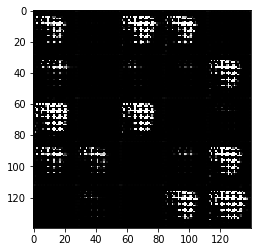

Epoch 2/2... Discriminator_loss: 0.0027760500088334084 Generator_loss: 10.384963989257812
Epoch 2/2... Discriminator_loss: 0.012947792187333107 Generator_loss: 8.519001960754395
Epoch 2/2... Discriminator_loss: 0.026484603062272072 Generator_loss: 7.430816173553467
Epoch 2/2... Discriminator_loss: 0.006974285934120417 Generator_loss: 9.005446434020996
Epoch 2/2... Discriminator_loss: 0.0028517942409962416 Generator_loss: 8.298592567443848
Epoch 2/2... Discriminator_loss: 0.009013431146740913 Generator_loss: 6.778411865234375
Epoch 2/2... Discriminator_loss: 0.0038835969753563404 Generator_loss: 6.468749046325684
Epoch 2/2... Discriminator_loss: 0.006388131063431501 Generator_loss: 5.4336771965026855
Epoch 2/2... Discriminator_loss: 0.005939953960478306 Generator_loss: 6.274188995361328
Epoch 2/2... Discriminator_loss: 0.01980014517903328 Generator_loss: 6.0325164794921875


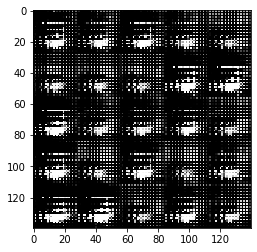

Epoch 2/2... Discriminator_loss: 0.01820383593440056 Generator_loss: 5.01352596282959
Epoch 2/2... Discriminator_loss: 0.014564992859959602 Generator_loss: 5.3959550857543945
Epoch 2/2... Discriminator_loss: 0.05597095191478729 Generator_loss: 5.2857584953308105
Epoch 2/2... Discriminator_loss: 0.012411726638674736 Generator_loss: 6.805479526519775
Epoch 2/2... Discriminator_loss: 0.017025312408804893 Generator_loss: 5.392403602600098
Epoch 2/2... Discriminator_loss: 0.00025184068363159895 Generator_loss: 13.675354957580566
Epoch 2/2... Discriminator_loss: 0.016725102439522743 Generator_loss: 4.488085746765137
Epoch 2/2... Discriminator_loss: 0.00434815464541316 Generator_loss: 6.335030555725098
Epoch 2/2... Discriminator_loss: 0.00243624416179955 Generator_loss: 6.762194633483887
Epoch 2/2... Discriminator_loss: 0.0009968646336346865 Generator_loss: 8.673514366149902


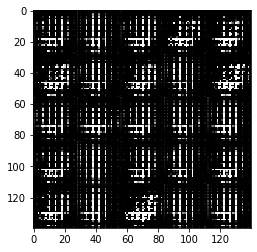

Epoch 2/2... Discriminator_loss: 0.0008450914756394923 Generator_loss: 10.201988220214844
Epoch 2/2... Discriminator_loss: 0.006036658771336079 Generator_loss: 6.553830146789551
Epoch 2/2... Discriminator_loss: 0.002076171338558197 Generator_loss: 7.045741081237793
Epoch 2/2... Discriminator_loss: 0.002030809409916401 Generator_loss: 8.204611778259277
Epoch 2/2... Discriminator_loss: 0.002830593381077051 Generator_loss: 8.565879821777344
Epoch 2/2... Discriminator_loss: 1.5316943972720765e-05 Generator_loss: 19.802188873291016
Epoch 2/2... Discriminator_loss: 0.0021642735227942467 Generator_loss: 9.021186828613281
Epoch 2/2... Discriminator_loss: 0.0021773253101855516 Generator_loss: 7.180004596710205
Epoch 2/2... Discriminator_loss: 0.005305461119860411 Generator_loss: 6.888355255126953
Epoch 2/2... Discriminator_loss: 0.0006198466289788485 Generator_loss: 11.481414794921875


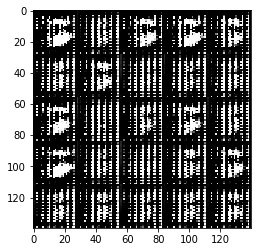

Epoch 2/2... Discriminator_loss: 0.006439698860049248 Generator_loss: 6.140219688415527
Epoch 2/2... Discriminator_loss: 0.0006379064288921654 Generator_loss: 16.659759521484375
Epoch 2/2... Discriminator_loss: 0.0018675914034247398 Generator_loss: 6.932339668273926
Epoch 2/2... Discriminator_loss: 0.0034469119273126125 Generator_loss: 6.575543403625488
Epoch 2/2... Discriminator_loss: 0.0017661494202911854 Generator_loss: 6.8028244972229
Epoch 2/2... Discriminator_loss: 0.004870947916060686 Generator_loss: 6.273514747619629
Epoch 2/2... Discriminator_loss: 0.005629384890198708 Generator_loss: 5.771559715270996
Epoch 2/2... Discriminator_loss: 0.00653183925896883 Generator_loss: 6.107565879821777
Epoch 2/2... Discriminator_loss: 0.007575158961117268 Generator_loss: 5.958662509918213
Epoch 2/2... Discriminator_loss: 0.00025854495470412076 Generator_loss: 36.83185958862305


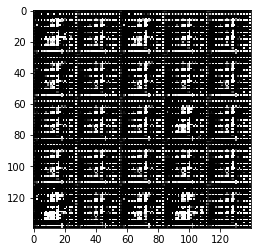

Epoch 2/2... Discriminator_loss: 9.975299690268002e-06 Generator_loss: 27.16476058959961
Epoch 2/2... Discriminator_loss: 2.2693948267260566e-06 Generator_loss: 16.193126678466797
Epoch 2/2... Discriminator_loss: 0.007026661653071642 Generator_loss: 8.373327255249023
Epoch 2/2... Discriminator_loss: 0.004076564684510231 Generator_loss: 9.101511001586914
Epoch 2/2... Discriminator_loss: 0.003280692733824253 Generator_loss: 8.702041625976562
Epoch 2/2... Discriminator_loss: 0.004128979053348303 Generator_loss: 8.972616195678711
Epoch 2/2... Discriminator_loss: 0.0003467992937657982 Generator_loss: 10.753087997436523
Epoch 2/2... Discriminator_loss: 0.002177335089072585 Generator_loss: 7.268024444580078
Epoch 2/2... Discriminator_loss: 0.028278812766075134 Generator_loss: 6.605504035949707
Epoch 2/2... Discriminator_loss: 0.0014813513262197375 Generator_loss: 8.223400115966797


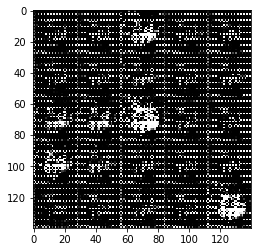

Epoch 2/2... Discriminator_loss: 0.01054996158927679 Generator_loss: 20.05000114440918
Epoch 2/2... Discriminator_loss: 0.0018800164107233286 Generator_loss: 8.888179779052734
Epoch 2/2... Discriminator_loss: 0.003058036556467414 Generator_loss: 7.631519794464111
Epoch 2/2... Discriminator_loss: 0.00028267563902772963 Generator_loss: 9.356678009033203
Epoch 2/2... Discriminator_loss: 0.3763066232204437 Generator_loss: 3.0500030517578125
Epoch 2/2... Discriminator_loss: 0.0003293119079899043 Generator_loss: 23.115968704223633
Epoch 2/2... Discriminator_loss: 0.004704032093286514 Generator_loss: 17.922597885131836
Epoch 2/2... Discriminator_loss: 0.0046089161187410355 Generator_loss: 11.223761558532715
Epoch 2/2... Discriminator_loss: 0.00244625355117023 Generator_loss: 9.369929313659668
Epoch 2/2... Discriminator_loss: 0.003992608282715082 Generator_loss: 7.429553508758545


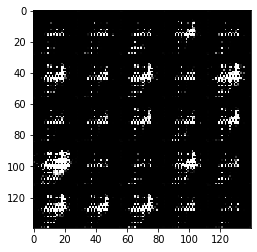

Epoch 2/2... Discriminator_loss: 0.0005124541348777711 Generator_loss: 9.141141891479492
Epoch 2/2... Discriminator_loss: 0.0015481364680454135 Generator_loss: 7.448566436767578
Epoch 2/2... Discriminator_loss: 0.0017049668822437525 Generator_loss: 7.080760478973389
Epoch 2/2... Discriminator_loss: 0.002020596992224455 Generator_loss: 6.708961486816406
Epoch 2/2... Discriminator_loss: 0.002187279285863042 Generator_loss: 6.339556694030762
Epoch 2/2... Discriminator_loss: 0.0036389559973031282 Generator_loss: 6.363028526306152
Epoch 2/2... Discriminator_loss: 0.004434789996594191 Generator_loss: 6.731549263000488
Epoch 2/2... Discriminator_loss: 0.010752076283097267 Generator_loss: 8.124223709106445
Epoch 2/2... Discriminator_loss: 0.0013721379218623042 Generator_loss: 7.652199745178223
Epoch 2/2... Discriminator_loss: 0.00312140304595232 Generator_loss: 7.599508285522461


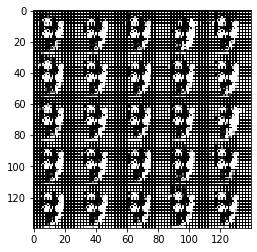

Epoch 2/2... Discriminator_loss: 0.0014918502420186996 Generator_loss: 6.81361198425293
Epoch 2/2... Discriminator_loss: 0.0042791967280209064 Generator_loss: 5.756741523742676
Epoch 2/2... Discriminator_loss: 0.001020411029458046 Generator_loss: 7.064024925231934
Epoch 2/2... Discriminator_loss: 0.0013344641774892807 Generator_loss: 6.83026647567749
Epoch 2/2... Discriminator_loss: 0.00031996704638004303 Generator_loss: 8.214178085327148
Epoch 2/2... Discriminator_loss: 0.0012563824420794845 Generator_loss: 7.858757972717285
Epoch 2/2... Discriminator_loss: 0.0003331468324176967 Generator_loss: 9.48359489440918
Epoch 2/2... Discriminator_loss: 0.000674435228575021 Generator_loss: 7.746638298034668
Epoch 2/2... Discriminator_loss: 0.0005516371456906199 Generator_loss: 7.824772357940674
Epoch 2/2... Discriminator_loss: 0.0005074383225291967 Generator_loss: 7.9428815841674805


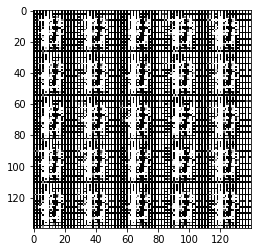

Epoch 2/2... Discriminator_loss: 0.00047534762416034937 Generator_loss: 7.939971923828125
Epoch 2/2... Discriminator_loss: 0.00043667256250046194 Generator_loss: 7.863778114318848
Epoch 2/2... Discriminator_loss: 0.0003042616881430149 Generator_loss: 8.35936450958252
Epoch 2/2... Discriminator_loss: 0.0002535730309318751 Generator_loss: 8.405570983886719
Epoch 2/2... Discriminator_loss: 0.0002084970474243164 Generator_loss: 8.500394821166992
Epoch 2/2... Discriminator_loss: 0.00019070004054810852 Generator_loss: 8.601011276245117
Epoch 2/2... Discriminator_loss: 0.00013650156324729323 Generator_loss: 8.91890811920166
Epoch 2/2... Discriminator_loss: 0.0001434260921087116 Generator_loss: 8.881858825683594
Epoch 2/2... Discriminator_loss: 0.00011793306475738063 Generator_loss: 9.120336532592773
Epoch 2/2... Discriminator_loss: 0.00010499217751203105 Generator_loss: 9.211021423339844


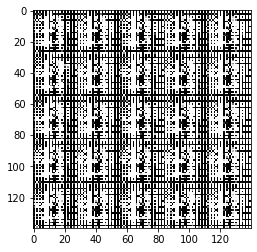

Epoch 2/2... Discriminator_loss: 0.0001460849161958322 Generator_loss: 8.904194831848145
Epoch 2/2... Discriminator_loss: 0.00014173721137922257 Generator_loss: 8.888528823852539
Epoch 2/2... Discriminator_loss: 0.0004640913102775812 Generator_loss: 9.158449172973633
Epoch 2/2... Discriminator_loss: 8.920986147131771e-05 Generator_loss: 9.411174774169922
Epoch 2/2... Discriminator_loss: 7.207384624052793e-05 Generator_loss: 9.571100234985352
Epoch 2/2... Discriminator_loss: 6.441512960009277e-05 Generator_loss: 9.692075729370117
Epoch 2/2... Discriminator_loss: 9.219197818310931e-05 Generator_loss: 9.316291809082031
Epoch 2/2... Discriminator_loss: 0.00013399960880633444 Generator_loss: 9.05496883392334
Epoch 2/2... Discriminator_loss: 0.00012811803026124835 Generator_loss: 9.136641502380371
Epoch 2/2... Discriminator_loss: 0.00015421677380800247 Generator_loss: 8.865802764892578


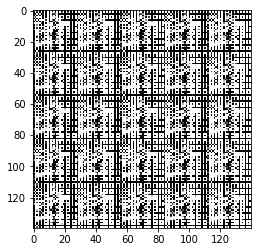

Epoch 2/2... Discriminator_loss: 0.0001387325464747846 Generator_loss: 8.932931900024414
Epoch 2/2... Discriminator_loss: 9.47474836721085e-05 Generator_loss: 9.277377128601074
Epoch 2/2... Discriminator_loss: 0.00015434451051987708 Generator_loss: 9.569709777832031
Epoch 2/2... Discriminator_loss: 6.194982415763661e-05 Generator_loss: 9.716381072998047
Epoch 2/2... Discriminator_loss: 5.784994573332369e-05 Generator_loss: 9.802420616149902
Epoch 2/2... Discriminator_loss: 7.266749889822677e-05 Generator_loss: 9.757940292358398
Epoch 2/2... Discriminator_loss: 5.841394158778712e-05 Generator_loss: 9.798715591430664
Epoch 2/2... Discriminator_loss: 6.245784607017413e-05 Generator_loss: 9.718588829040527
Epoch 2/2... Discriminator_loss: 6.357984966598451e-05 Generator_loss: 9.720579147338867
Epoch 2/2... Discriminator_loss: 7.716107211308554e-05 Generator_loss: 9.526998519897461


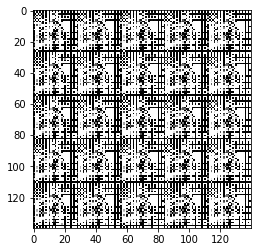

Epoch 2/2... Discriminator_loss: 0.00014842864766251296 Generator_loss: 8.875337600708008
Epoch 2/2... Discriminator_loss: 0.0002883296401705593 Generator_loss: 8.18705940246582
Epoch 2/2... Discriminator_loss: 0.00015066747437231243 Generator_loss: 8.817220687866211
Epoch 2/2... Discriminator_loss: 0.00010743800521595404 Generator_loss: 9.174619674682617
Epoch 2/2... Discriminator_loss: 9.97899696812965e-05 Generator_loss: 9.22282600402832
Epoch 2/2... Discriminator_loss: 8.440711098955944e-05 Generator_loss: 9.583486557006836
Epoch 2/2... Discriminator_loss: 0.00011042342521250248 Generator_loss: 9.8040132522583
Epoch 2/2... Discriminator_loss: 5.4417709179688245e-05 Generator_loss: 9.958833694458008
Epoch 2/2... Discriminator_loss: 4.458950934349559e-05 Generator_loss: 10.114538192749023
Epoch 2/2... Discriminator_loss: 3.337468660902232e-05 Generator_loss: 10.336420059204102


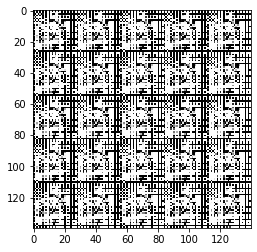

Epoch 2/2... Discriminator_loss: 3.210623617633246e-05 Generator_loss: 10.414837837219238
Epoch 2/2... Discriminator_loss: 3.1217150535667315e-05 Generator_loss: 10.46801471710205
Epoch 2/2... Discriminator_loss: 3.894879773724824e-05 Generator_loss: 10.16127872467041
Epoch 2/2... Discriminator_loss: 5.427339056041092e-05 Generator_loss: 9.849639892578125
Epoch 2/2... Discriminator_loss: 5.69796102354303e-05 Generator_loss: 9.804628372192383
Epoch 2/2... Discriminator_loss: 4.84409392811358e-05 Generator_loss: 9.998135566711426
Epoch 2/2... Discriminator_loss: 4.628863462130539e-05 Generator_loss: 10.000685691833496
Epoch 2/2... Discriminator_loss: 4.043030639877543e-05 Generator_loss: 10.13120174407959
Epoch 2/2... Discriminator_loss: 5.535356103791855e-05 Generator_loss: 9.828523635864258
Epoch 2/2... Discriminator_loss: 5.283517748466693e-05 Generator_loss: 9.866357803344727


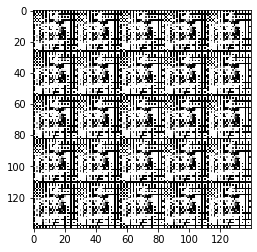

Epoch 2/2... Discriminator_loss: 5.525712913367897e-05 Generator_loss: 9.842275619506836
Epoch 2/2... Discriminator_loss: 0.00013119401410222054 Generator_loss: 9.718738555908203
Epoch 2/2... Discriminator_loss: 6.466931517934427e-05 Generator_loss: 9.667997360229492
Epoch 2/2... Discriminator_loss: 8.573175000492483e-05 Generator_loss: 9.470235824584961
Epoch 2/2... Discriminator_loss: 6.48149216431193e-05 Generator_loss: 9.651123046875
Epoch 2/2... Discriminator_loss: 7.746370101813227e-05 Generator_loss: 9.477296829223633
Epoch 2/2... Discriminator_loss: 6.859103450551629e-05 Generator_loss: 9.592995643615723
Epoch 2/2... Discriminator_loss: 6.380774721037596e-05 Generator_loss: 9.6705904006958
Epoch 2/2... Discriminator_loss: 7.063437078613788e-05 Generator_loss: 9.567626953125
Epoch 2/2... Discriminator_loss: 8.371666626771912e-05 Generator_loss: 9.395486831665039


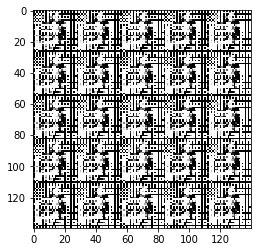

Epoch 2/2... Discriminator_loss: 0.00010982951062032953 Generator_loss: 9.125139236450195
Epoch 2/2... Discriminator_loss: 0.000183882235432975 Generator_loss: 8.606372833251953
Epoch 2/2... Discriminator_loss: 0.00013580426457338035 Generator_loss: 8.90921688079834
Epoch 2/2... Discriminator_loss: 0.00010995104094035923 Generator_loss: 9.131965637207031
Epoch 2/2... Discriminator_loss: 0.00011450999591033906 Generator_loss: 9.078140258789062
Epoch 2/2... Discriminator_loss: 8.552552026230842e-05 Generator_loss: 9.372518539428711
Epoch 2/2... Discriminator_loss: 7.907531835371628e-05 Generator_loss: 9.453506469726562
Epoch 2/2... Discriminator_loss: 7.271953654708341e-05 Generator_loss: 9.580196380615234
Epoch 2/2... Discriminator_loss: 6.809873593738303e-05 Generator_loss: 9.602645874023438
Epoch 2/2... Discriminator_loss: 5.9427955420687795e-05 Generator_loss: 9.73971939086914


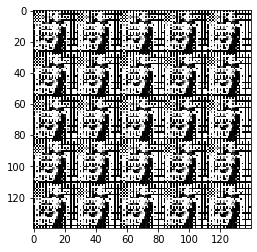

Epoch 2/2... Discriminator_loss: 0.00011062870180467144 Generator_loss: 9.117776870727539
Epoch 2/2... Discriminator_loss: 0.0003590438573155552 Generator_loss: 7.959405422210693
Epoch 2/2... Discriminator_loss: 0.0004611965559888631 Generator_loss: 7.767621040344238
Epoch 2/2... Discriminator_loss: 0.0006232401356101036 Generator_loss: 7.438791275024414
Epoch 2/2... Discriminator_loss: 0.0008983352454379201 Generator_loss: 7.0834550857543945


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = None
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.